<a href="https://colab.research.google.com/github/Kudrettinkadir/Py-AI/blob/main/SHVN_Keras_With_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import keras
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline
import cv2
import glob
from keras.optimizers import SGD

In [4]:
np.random.seed(20)

In [5]:
train_raw = loadmat('svhn/train_32x32.mat')
test_raw = loadmat('svhn/test_32x32.mat')

In [6]:
train_images = np.array(train_raw['X'])
test_images = np.array(test_raw['X'])

train_labels = train_raw['y']
test_labels = test_raw['y']

In [7]:
train_images = np.moveaxis(train_images, -1, 0)
test_images = np.moveaxis(test_images, -1, 0)

In [8]:
train_images = train_images.astype('float64')
test_images = test_images.astype('float64')

In [9]:
train_labels = train_labels.astype('int64')
test_labels = test_labels.astype('int64')

In [10]:
train_images /=  225.0
test_images /=  255.0

In [11]:
lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels)
test_labels = lb.fit_transform(test_labels)

In [12]:
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels,
                                                  test_size=0.15, random_state=22)

In [13]:
datagen = ImageDataGenerator(rotation_range=8,
                             zoom_range=[0.95, 1.05],
                             height_shift_range=0.10,
                             shear_range=0.15)

In [16]:
model = keras.Sequential([
   
    keras.layers.BatchNormalization(),
     keras.layers.Dense(32,  activation='softmax'),
    
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(64,  activation='softmax'),
   
    
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128,  activation='softmax'),
   
    keras.layers.BatchNormalization(),
    
    
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128,  activation='softmax'),
    keras.layers.Flatten(),
   
    keras.layers.Dropout(0.4),    
    keras.layers.Dense(10,  activation='softmax'),
])

early_stopping = keras.callbacks.EarlyStopping(patience=8)
optimizer = keras.optimizers.Adam(learning_rate=1e-3, amsgrad=True)
model_checkpoint = keras.callbacks.ModelCheckpoint(
                   '/kaggle/working/best_cnn.h5', 
                   save_best_only=True)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=128),
                              epochs=70, validation_data=(X_val, y_val),
                              callbacks=[early_stopping, model_checkpoint])

Epoch 1/70
487/487 [==============================] - 571s 1s/step - loss: 2.2895 - accuracy: 0.1643 - val_loss: 2.2748 - val_accuracy: 0.1431
Epoch 2/70
487/487 [==============================] - 552s 1s/step - loss: 2.2820 - accuracy: 0.1666 - val_loss: 2.2699 - val_accuracy: 0.1949
Epoch 3/70
487/487 [==============================] - 552s 1s/step - loss: 2.2832 - accuracy: 0.1689 - val_loss: 2.2574 - val_accuracy: 0.1949
Epoch 4/70
487/487 [==============================] - 550s 1s/step - loss: 2.2809 - accuracy: 0.1735 - val_loss: 2.2504 - val_accuracy: 0.1949
Epoch 5/70
487/487 [==============================] - 552s 1s/step - loss: 2.2786 - accuracy: 0.1720 - val_loss: 2.2728 - val_accuracy: 0.1949
Epoch 6/70
487/487 [==============================] - 552s 1s/step - loss: 2.2912 - accuracy: 0.1660 - val_loss: 2.2405 - val_accuracy: 0.1949
Epoch 7/70
487/487 [==============================] - 551s 1s/step - loss: 2.2819 - accuracy: 0.1680 - val_loss: 2.2820 - val_accuracy: 0.1431

In [18]:
test_loss, test_acc = model.evaluate(x=test_images, y=test_labels, verbose=0)

print('Test accuracy is: {:0.4f} \nTest loss is: {:0.4f}'.
      format(test_acc, test_loss))

Test accuracy is: 0.3266 
Test loss is: 2.1035


In [21]:
y_pred = model.predict(X_train)

In [23]:
y_pred = lb.inverse_transform(y_pred, lb.classes_)
y_train = lb.inverse_transform(y_train, lb.classes_)

AxisError: ignored

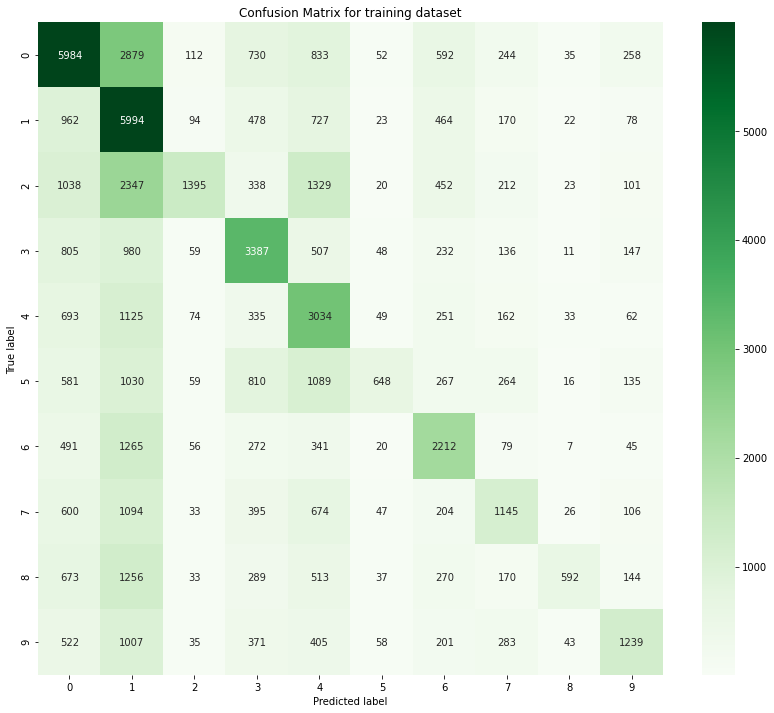

In [24]:
matrix = confusion_matrix(y_train, y_pred, labels=lb.classes_)

fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(matrix, annot=True, cmap='Greens', fmt='d', ax=ax)
plt.title('Confusion Matrix for training dataset')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()